In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json
/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json
/kaggle/input/arc-prize-2024/sample_submission.json
/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json
/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json


In [2]:
import json

def load_json(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

#load the data
training_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_solutions.json')
evaluation_solutions = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_solutions.json')
training_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_training_challenges.json')
evaluation_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_evaluation_challenges.json')
test_challenges = load_json('/kaggle/input/arc-prize-2024/arc-agi_test_challenges.json')
sample_submission = load_json('/kaggle/input/arc-prize-2024/sample_submission.json')

In [3]:
def inspect_data(data, num_samples=1):
    for key, value in list(data.items())[:num_samples]:
        print(f"Key: {key}")
        print(f"Sample Data: {value}\n")
        
print("Training Solutions:")
inspect_data(training_solutions)

print("Training Challenges:")
inspect_data(training_challenges)

print("Evaluation Solutions:")
inspect_data(evaluation_solutions)

print("Evaluation Challenges:")
inspect_data(evaluation_challenges)

print("Test Challenges:")
inspect_data(test_challenges)

print("Sample submission:")
inspect_data(sample_submission)

Training Solutions:
Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]

Training Challenges:
Key: 007bbfb7
Sample Data: {'test': [{'input': [[7, 0, 7], [7, 0, 7], [7, 7, 0]]}], 'train': [{'input': [[0, 7, 7], [7, 7, 7], [0, 7, 7]], 'output': [[0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [7, 7, 7, 7, 7, 7, 7, 7, 7], [0, 7, 7, 0, 7, 7, 0, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7], [0, 0, 0, 7, 7, 7, 7, 7, 7], [0, 0, 0, 0, 7, 7, 0, 7, 7]]}, {'input': [[4, 0, 4], [0, 0, 0], [0, 4, 0]], 'output': [[4, 0, 4, 0, 0, 0, 4, 0, 4], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 4, 0, 0, 0, 0, 0, 4, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 4, 0, 4, 0, 0,

In [4]:
sample_key = list(training_solutions.keys())[0]
print(f"Sample Key: {sample_key}")
print("Sample Data:", training_solutions[sample_key])

Sample Key: 007bbfb7
Sample Data: [[[7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 0, 7, 0, 0, 0, 7, 0, 7], [7, 7, 0, 0, 0, 0, 7, 7, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 0, 7, 7, 0, 7, 0, 0, 0], [7, 7, 0, 7, 7, 0, 0, 0, 0]]]


In [5]:
#compute the mean, standard deviation, minimum, and maximum values of the data
sample_data = training_solutions[sample_key]

#convert to numpy array
data_array = np.array(sample_data)

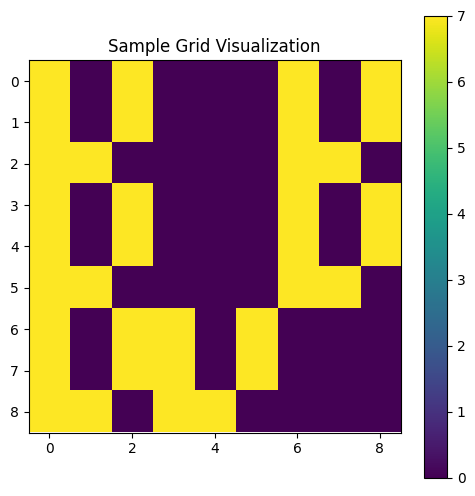

Grid Summary:
Mean Value: 3.11
Standard Deviation: 3.48
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences


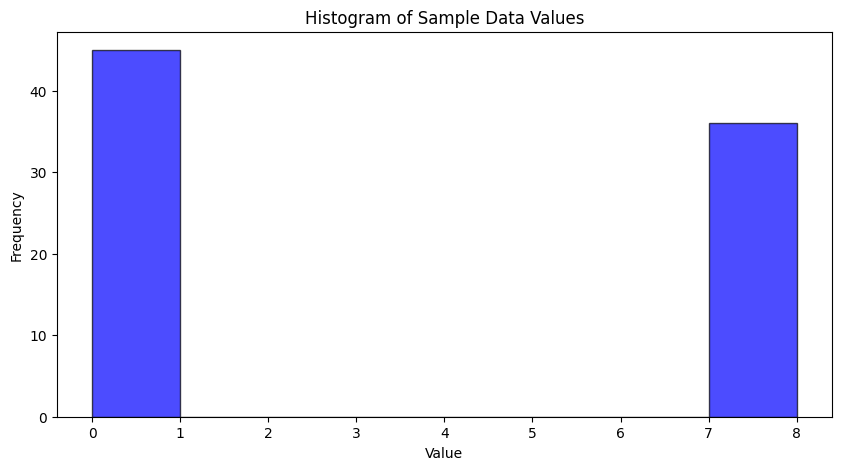

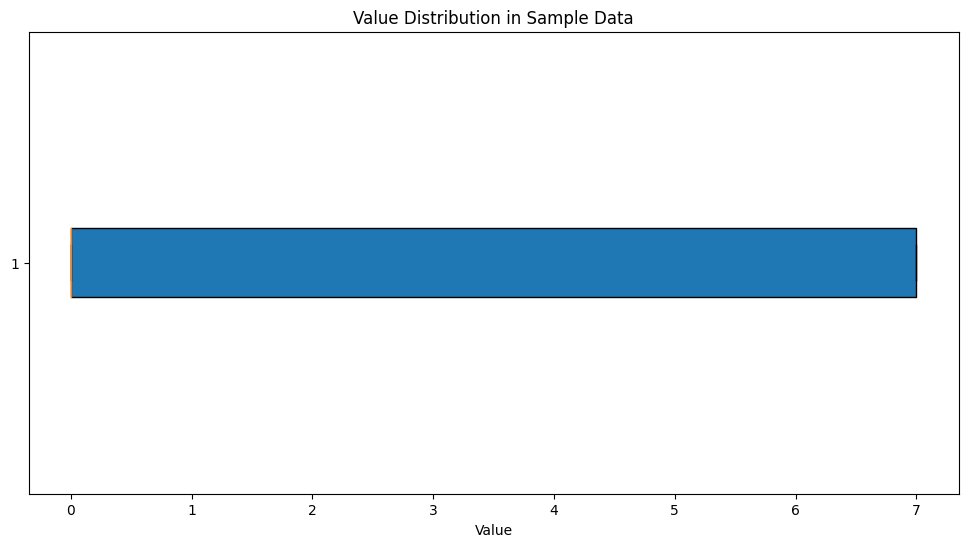

Histogram Summary:
Mean Value: 3.11
Median Value: 0.00
Minimum Value: 0
Maximum Value: 7

Frequency Distribution:
Value 0: 45 occurrences
Value 7: 36 occurrences
Boxplot Summary:
Median Value: 0.00
1st Quartile (Q1): 0.00
3rd Quartile (Q3): 7.00
Interquartile Range (IQR): 7.00
Minimum Value: 0
Maximum Value: 7
Number of Outliers: 0


In [6]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_grid(data, title="Grid Visualization"):
    #remove any singleton dimensions
    data_squeezed = np.squeeze(data)
    plt.figure(figsize=(6, 6))
    plt.imshow(data_squeezed, cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.show()

def summarize_grid(data):
    #calculate basic statistics
    mean = np.mean(data)
    std_dev = np.std(data)
    min_val = np.min(data)
    max_val = np.max(data)
    
    #frequency distribution
    flat_data = data.flatten()
    freq_dist = Counter(flat_data)
    
    return mean, std_dev, min_val, max_val, freq_dist

def print_summary(mean, std_dev, min_val, max_val, freq_dist):
    print("Grid Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def plot_histogram(data, title="Histogram of Data Values"):
    plt.figure(figsize=(10, 5))
    plt.hist(data.flatten(), bins=range(int(np.min(data)), int(np.max(data)) + 2), color='blue', alpha=0.7, edgecolor='black')
    plt.title(title)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

def plot_value_distribution(data, title="Value Distribution"):
    plt.figure(figsize=(12, 6))
    plt.boxplot(data.flatten(), vert=False, patch_artist=True)
    plt.title(title)
    plt.xlabel('Value')
    plt.show()

def summarize_histogram(data):
    flat_data = data.flatten()
    mean = np.mean(flat_data)
    median = np.median(flat_data)
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    unique, counts = np.unique(flat_data, return_counts=True)
    freq_dist = dict(zip(unique, counts))
    
    print("Histogram Summary:")
    print(f"Mean Value: {mean:.2f}")
    print(f"Median Value: {median:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print("\nFrequency Distribution:")
    for value, count in sorted(freq_dist.items()):
        print(f"Value {value}: {count} occurrences")

def summarize_boxplot(data):
    flat_data = data.flatten()
    median = np.median(flat_data)
    q1 = np.percentile(flat_data, 25)
    q3 = np.percentile(flat_data, 75)
    iqr = q3 - q1
    min_val = np.min(flat_data)
    max_val = np.max(flat_data)
    outliers = flat_data[(flat_data < (q1 - 1.5 * iqr)) | (flat_data > (q3 + 1.5 * iqr))]

    print("Boxplot Summary:")
    print(f"Median Value: {median:.2f}")
    print(f"1st Quartile (Q1): {q1:.2f}")
    print(f"3rd Quartile (Q3): {q3:.2f}")
    print(f"Interquartile Range (IQR): {iqr:.2f}")
    print(f"Minimum Value: {min_val}")
    print(f"Maximum Value: {max_val}")
    print(f"Number of Outliers: {len(outliers)}")
    if len(outliers) > 0:
        print("Outlier Values:", np.unique(outliers))

#plot the grid
plot_grid(data_array, title="Sample Grid Visualization")

#get statistics and frequency distribution
mean, std_dev, min_val, max_val, freq_dist = summarize_grid(data_array)

#print textual summary
print_summary(mean, std_dev, min_val, max_val, freq_dist)

#plot histogram and boxplot
plot_histogram(data_array, title="Histogram of Sample Data Values")
plot_value_distribution(data_array, title="Value Distribution in Sample Data")

#print textual summaries for histogram and boxplot
summarize_histogram(data_array)
summarize_boxplot(data_array)

In [7]:
class DataProcessor:
    def __init__(self, training_data, test_data, target_shape=(24, 24)):
        self.training_data = training_data
        self.test_data = test_data
        self.target_shape = target_shape

    def resize_array(self, array):
        """Resize array to the target dimensions with padding or cropping."""
        array = np.array(array)
        original_shape = array.shape

        #handle arrays smaller than the target shape
        if original_shape[0] < self.target_shape[0]:
            padded_array = np.zeros((self.target_shape[0], array.shape[1]), dtype=array.dtype)
            padded_array[:array.shape[0], :] = array
            array = padded_array
        if original_shape[1] < self.target_shape[1]:
            padded_array = np.zeros((array.shape[0], self.target_shape[1]), dtype=array.dtype)
            padded_array[:, :array.shape[1]] = array
            array = padded_array

        #handle arrays larger than the target shape
        if array.shape[0] > self.target_shape[0]:
            array = array[:self.target_shape[0], :]
        if array.shape[1] > self.target_shape[1]:
            array = array[:, :self.target_shape[1]]

        return array

    def preprocess_data(self):
        X_train_list = []
        y_train_list = []
        X_test_list = []

        #process training data
        for key, entries in self.training_data.items():
            if isinstance(entries, dict):
                train_entries = entries.get('train', [])
                for entry in train_entries:
                    X = entry.get('input', [])
                    y = entry.get('output', [])
                    
                    try:
                        X = self.resize_array(X)
                        y = self.resize_array(y)
                        
                        if X.shape == y.shape:
                            X_train_list.append(X.flatten())
                            y_train_list.append(y.flatten())
                        else:
                            print(f"Skipping inconsistent entry for key {key}. X shape: {X.shape}, y shape: {y.shape}")
                    except Exception as e:
                        print(f"Error processing entry for key {key}: {e}")
        
        #convert lists to NumPy arrays
        try:
            self.X_train = np.array(X_train_list)
            self.y_train = np.array(y_train_list)
        except ValueError as e:
            print(f"ValueError during conversion to NumPy arrays: {e}")
            self.X_train = None
            self.y_train = None

        #process test data
        for key, entries in self.test_data.items():
            if isinstance(entries, dict):
                test_entries = entries.get('test', [])
                for entry in test_entries:
                    X = entry.get('input', [])
                    
                    try:
                        X = self.resize_array(X)
                        X_test_list.append(X.flatten())
                    except Exception as e:
                        print(f"Error processing test entry for key {key}: {e}")
        
        #convert lists to NumPy arrays
        try:
            self.X_test = np.array(X_test_list)
        except ValueError as e:
            print(f"ValueError during conversion to NumPy arrays: {e}")
            self.X_test = None

    def get_preprocessed_data(self):
        return self.X_train, self.y_train, self.X_test

#initialize and process data
data_processor = DataProcessor(training_challenges, test_challenges)
data_processor.preprocess_data()

#retrieve preprocessed data
try:
    X_train, y_train, X_test = data_processor.get_preprocessed_data()
    if X_train is not None and y_train is not None and X_test is not None:
        #print the results to verify
        print("X_train shape:", X_train.shape)
        print("y_train shape:", y_train.shape)
        print("X_test shape:", X_test.shape)
    else:
        print("Data processing did not complete successfully.")
except AttributeError as e:
    print(f"AttributeError: {e}. The data may not have been processed correctly.")
except Exception as e:
    print(f"An error occurred: {e}.")

X_train shape: (1302, 576)
y_train shape: (1302, 576)
X_test shape: (105, 576)


In [8]:
class IntegratedRepresentationLearning:
    """Initialize the representation learning module."""
    def __init__(self):
        pass
    
    def process_input(self, data):
        """Process various input data types into a unified representation."""
        return unified_representation

In [9]:
class MultiModalInputs:
    """Initialize the multi-modal input handler."""
    def __init__(self):
        pass
    
    def handle_input(self, inputs):
        """Handle diverse input formats and integrate them into a common pipeline."""
        return integrated_inputs

In [10]:
class AdaptiveNeuralNetworkLayers:
    """Initialize the adaptive neural network layers."""
    def __init__(self):
        pass
    
    def adapt_network(self, complexity):
        """Adjust network architecture based on task complexity."""
        return adaptive_network

In [11]:
class HierarchicalAttentionMechanisms:
    """Initialize the hierarchical attention mechanisms."""
    def __init__(self):
        pass
    
    def apply_attention(self, data):
        """Apply hierarchical attention to capture patterns at various abstraction levels."""
        return attention_output

In [12]:
class SymbolicReasoningIntegration:
    """Initialize symbolic reasoning integration."""
    def __init__(self):
        pass
    
    def reason(self, data):
        """Integrate symbolic reasoning with neural learning."""
        return reasoned_output

In [13]:
class NeuralSymbolicFusion:
    """Initialize the neural-symbolic fusion module."""
    def __init__(self):
        pass
    
    def fuse(self, neural_output, symbolic_output):
        """Combine neural and symbolic outputs for enhanced reasoning."""
        return fused_output

In [14]:
class MetaLearningCapabilities:
    """Initialize meta-learning capabilities."""
    def __init__(self):
        pass
    
    def meta_learn(self, task):
        """Learn how to learn and adapt to new tasks with minimal data."""
        return meta_learned_model

In [15]:
class CrossDomainKnowledgeTransfer:
    """Initialize cross-domain knowledge transfer."""
    def __init__(self):
        pass
    
    def transfer_knowledge(self, source_domain, target_domain):
        """Transfer knowledge from one domain to another."""
        return transferred_knowledge

In [16]:
class ScalableTrainingTechniques:
    """Initialize scalable training techniques."""
    def __init__(self):
        pass
    
    def scale_training(self, data):
        """Scale training processes using distributed computing."""
        return scalable_training_output

In [17]:
class ResourceEfficientDesign:
    """Initialize resource-efficient design."""
    def __init__(self):
        pass
    
    def optimize_resources(self, model):
        """Balance computational demands with performance."""
        return optimized_model

In [18]:
class NoveltyAdaptation:
    """Initialize novelty adaptation mechanisms."""
    def __init__(self):
        pass
    
    def adapt_to_novelty(self, new_data):
        """Adapt to unseen inputs and tasks."""
        return adapted_output

In [19]:
class AdversarialResilience:
    """Initialize adversarial resilience measures."""
    def __init__(self):
        pass
    
    def protect_against_adversarial_attacks(self, data):
        """Protect the model against adversarial attacks."""
        return resilient_output

In [20]:
class TransparentDecisionMaking:
    """Initialize transparent decision-making."""
    def __init__(self):
        pass
    
    def explain_decision(self, decision):
        """Provide explanations for model decisions."""
        return explanation

In [21]:
class VisualizationTools:
    """Initialize visualization tools."""
    def __init__(self):
        pass
    
    def visualize_learning(self, data):
        """Offer tools to visualize learning and decision-making processes."""
        return visualization

In [22]:
class SelfImprovementMechanisms:
    """Initialize self-improvement mechanisms."""
    def __init__(self):
        pass
    
    def self_improve(self, feedback):
        """Continuously improve the model based on feedback."""
        return improved_model

In [23]:
class FeedbackIntegration:
    """Initialize feedback integration."""
    def __init__(self):
        pass
    
    def integrate_feedback(self, feedback):
        """Integrate user and performance feedback to refine the model."""
        return refined_model

In [24]:
class ModularArchitecture:
    """Initialize modular architecture."""
    def __init__(self):
        pass
    
    def configure_module(self, module_name):
        """Support interchangeable components within the architecture."""
        return configured_module

In [25]:
class ConfigurableLearningModules:
    """Initialize configurable learning modules."""
    def __init__(self):
        pass
    
    def configure_learning_module(self, module_params):
        """Customize learning modules for specific tasks."""
        return customized_module

In [26]:
class EthicalAIBehavior:
    """Initialize ethical AI behavior protocols."""
    def __init__(self):
        pass
    
    def enforce_ethics(self, data):
        """Ensure adherence to ethical guidelines and fairness."""
        return ethical_output

In [27]:
class SafetyProtocols:
    """Initialize safety protocols."""
    def __init__(self):
        pass
    
    def apply_safety_measures(self, system):
        """Implement fail-safes and safety measures."""
        return safe_system

In [28]:
class UserAccessibility:
    """Initialize user accessibility features."""
    def __init__(self):
        pass
    
    def adapt_interface(self, user_needs):
        """Customize the user interface for accessibility."""
        return accessible_interface

In [29]:
class AssistiveTechnologyIntegration:
    """Initialize assistive technology integration."""
    def __init__(self):
        pass
    
    def integrate_assistive_tech(self, tech):
        """Support integration with assistive technologies."""
        return integrated_technology

In [30]:
class AutomatedErrorDetection:
    """Initialize automated error detection."""
    def __init__(self):
        pass
    
    def detect_errors(self, system_output):
        """Automatically detect and address errors and bugs."""
        return corrected_output

In [31]:
class SelfHealingCapabilities:
    """Initialize self-healing capabilities."""
    def __init__(self):
        pass
    
    def heal_system(self, issue):
        """Self-heal system malfunctions or anomalies."""
        return healed_system

In [32]:
class SpamAndVirusDetection:
    """Initialize spam and virus detection."""
    def __init__(self):
        pass
    
    def detect_and_prevent(self, data):
        """Monitor for and prevent spam, viruses, and malicious activities."""
        return clean_data

In [33]:
class ProactiveSecurity:
    """Initialize proactive security measures."""
    def __init__(self):
        pass
    
    def anticipate_and_prevent(self, threats):
        """Anticipate potential security threats and take preventive measures."""
        return secure_system

In [34]:
class RiskAssessment:
    """Initialize risk assessment protocols."""
    def __init__(self):
        pass
    
    def assess_risks(self, system):
        """Assess and manage risks associated with system operations."""
        return risk_management_report

In [35]:
class Yambi:
    """Initialize the Yambi AGI model integrating all modules."""

    def __init__(self):
        """Initialize all components and modules for the AGI model."""
        self.representation_learning = IntegratedRepresentationLearning()
        self.multi_modal_inputs = MultiModalInputs()
        self.adaptive_layers = AdaptiveNeuralNetworkLayers()
        self.attention_mechanisms = HierarchicalAttentionMechanisms()
        self.symbolic_reasoning = SymbolicReasoningIntegration()
        self.neural_symbolic_fusion = NeuralSymbolicFusion()
        self.meta_learning = MetaLearningCapabilities()
        self.knowledge_transfer = CrossDomainKnowledgeTransfer()
        self.scalable_training = ScalableTrainingTechniques()
        self.resource_efficiency = ResourceEfficientDesign()
        self.novelty_adaptation = NoveltyAdaptation()
        self.adversarial_resilience = AdversarialResilience()
        self.transparent_decision_making = TransparentDecisionMaking()
        self.visualization_tools = VisualizationTools()
        self.self_improvement = SelfImprovementMechanisms()
        self.feedback_integration = FeedbackIntegration()
        self.modular_architecture = ModularArchitecture()
        self.configurable_modules = ConfigurableLearningModules()
        self.ethical_behavior = EthicalAIBehavior()
        self.safety_protocols = SafetyProtocols()
        self.user_accessibility = UserAccessibility()
        self.assistive_technology = AssistiveTechnologyIntegration()
        self.error_detection = AutomatedErrorDetection()
        self.self_healing = SelfHealingCapabilities()
        self.spam_virus_detection = SpamAndVirusDetection()
        self.proactive_security = ProactiveSecurity()
        self.risk_assessment = RiskAssessment()

    def process_data(self, data):
        """Process data through all modules to generate the desired output."""
        processed_data = self.representation_learning.process_input(data)
        processed_data = self.multi_modal_inputs.handle_input(processed_data)
        adaptive_network = self.adaptive_layers.adapt_network(len(processed_data))
        attention_output = self.attention_mechanisms.apply_attention(processed_data)
        reasoned_output = self.symbolic_reasoning.reason(processed_data)
        fused_output = self.neural_symbolic_fusion.fuse(adaptive_network, reasoned_output)
        meta_learned_model = self.meta_learning.meta_learn(fused_output)
        transferred_knowledge = self.knowledge_transfer.transfer_knowledge(meta_learned_model, processed_data)
        scalable_training_output = self.scalable_training.scale_training(transferred_knowledge)
        optimized_model = self.resource_efficiency.optimize_resources(scalable_training_output)
        adapted_output = self.novelty_adaptation.adapt_to_novelty(optimized_model)
        resilient_output = self.adversarial_resilience.protect_against_adversarial_attacks(adapted_output)
        explanation = self.transparent_decision_making.explain_decision(resilient_output)
        visualization = self.visualization_tools.visualize_learning(resilient_output)
        improved_model = self.self_improvement.self_improve(visualization)
        refined_model = self.feedback_integration.integrate_feedback(improved_model)
        configured_module = self.modular_architecture.configure_module(refined_model)
        customized_module = self.configurable_modules.configure_learning_module(configured_module)
        ethical_output = self.ethical_behavior.enforce_ethics(customized_module)
        safe_system = self.safety_protocols.apply_safety_measures(ethical_output)
        accessible_interface = self.user_accessibility.adapt_interface(safe_system)
        integrated_technology = self.assistive_technology.integrate_assistive_tech(accessible_interface)
        clean_data = self.spam_virus_detection.detect_and_prevent(integrated_technology)
        secure_system = self.proactive_security.anticipate_and_prevent(clean_data)
        risk_management_report = self.risk_assessment.assess_risks(secure_system)

        return risk_management_report

    def self_diagnose_and_repair(self):
        """Automatically diagnose and repair issues within the system."""
        detected_errors = self.error_detection.detect_errors(self.process_data({}))
        healed_system = self.self_healing.heal_system(detected_errors)
        return healed_system